[Link 1 para cálculo](https://community.infineon.com/t5/Knowledge-Base-Articles/Calculate-IGBT-losses-for-a-SPWM-voltage-source-converter/ta-p/381757#.)

[Link 2 Passo a Passo](https://community.infineon.com/t5/Knowledge-Base-Articles/IGBT-FF1200R12IE5P-Loss-calculation-in-an-SPWM-voltage-source-converter-topology/ta-p/383277)




In [1]:
import math

In [2]:
td = 2e-6  #Dead time
s_inversor = 20e3  #S_inversor(KVA)
v_dc = 800  #tensão do lado cc
v_ca = 440 #tensão do lado ca(RMS)(linha)
fp =1
fsw = 12e3 #frequencia de chaveamento
Ts = 1/fsw

In [3]:
#Corrente de linha a plena carga(RMS)
ifl = (s_inversor)/(v_ca*math.sqrt(3))
#Valor maximo do indice de modulação
m = (v_ca*math.sqrt(2))/v_dc
print(m)
print(ifl)

0.7778174593052023
26.2431940540739


In [4]:
ICM = ifl*math.sqrt(2) #modulo da corrente
print(ICM)

37.11348095126028


**Corrente média no IGBT**

$I_{c,avg} = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{CM}}{\pi} + m*fp*\frac{I_{CM}}{8}$



In [5]:
#Corrente media no igbt
ic_avg = (0.5 -(td/Ts))*(ICM/math.pi) +m*fp*(ICM/8)
ic_avg

9.231707021635614

**Corrente RMS no IGBT**

$I_{C,rms}^2 = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{CM}^2}{4} + m *fp* \frac{I_{CM}^2}{3\pi}$



In [6]:
#Corrente RMS no IGBT
ic_rms = (0.5 -(td/Ts))*(ICM*ICM/4)+m*fp*(ICM*ICM/(3*math.pi))
ic_rms = math.sqrt(ic_rms)
ic_rms

16.66097681035289

**Corrente média no diodo**

$I_{c,avg} = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{DM}}{\pi} - m*fp*\frac{I_{DM}}{8}$



In [7]:
#Corrente media no diodo
IDM = ICM #Definindo idm = icm
id_avg = ((0.5 +(td/Ts)))*(IDM/math.pi) - m*fp*(IDM/8)
id_avg

2.581880875844329

**Corrente RMS no diodo**

$I_{C,rms}^2 = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{DM}^2}{4} - m *fp* \frac{I_{DM}^2}{3\pi}$


In [8]:
#Corrente RMS no diodo
id_rms = ((0.5 +(td/Ts)))*(IDM*IDM/4) - m*fp*(IDM*IDM/(math.pi*3))
id_rms = math.sqrt(id_rms)
id_rms

8.170952747677173

**Gráficos para encontrar os valores de RT, VCE0 no IGBT:**


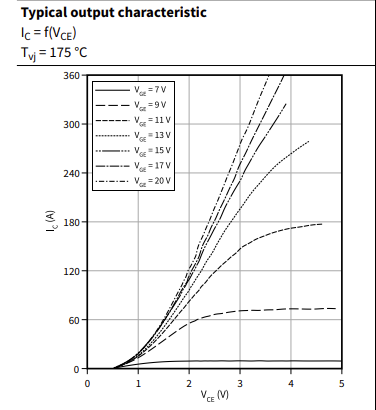

**Gráfico para obter  Eon, Eoff do IGBT:**

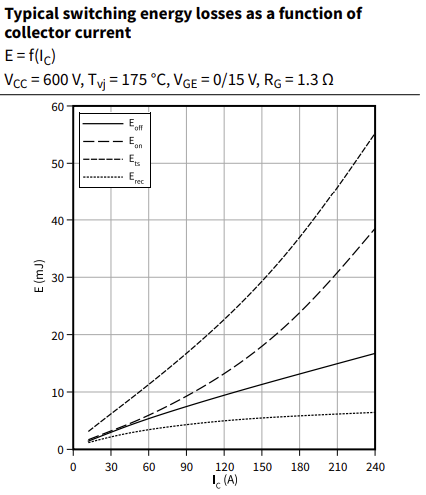




*   No exemplo foi escolhido Ic como 600A pois 600~= 1.5x400
*   A partir do valor de 600A, fiz uma reta e descobri o ponto VCE0, onde Ic é igual a zero
* Com o valor de VCE0, encontro RT = ΔVCE/ΔIc
* Para calcular Eon e Eoff, é necessário encontrar o valor no gráfico para a corrente média do igbt, que é aproximadamente 230. trace uma reta horizontal e encontre os valores na curva para determinada temperatura.


In [9]:
#Valores
vceo = 1.2
rt = 4.27e-3
eon = 2.85e-3
eoff = 2.35e-3

O mesmo procedimento para o diodo

In [10]:
rd = 6e-3
vdo = 0.9
erec = 1.25e-3

**Perdas IGBT**
$$P_{Tcon} = V_{CEO} \cdot I_{C,avg} + R_{T} \cdot I_{C,rms}^2$$

In [11]:
p_igbt_cond = vceo*ic_avg +rt*ic_rms*ic_rms
p_igbt_cond
vdc_datasheet = 600
p_igbt_chaveamento = fsw*(eon+eoff)*(v_dc/vdc_datasheet)
p_igbt_chaveamento

83.19999999999999

**Perdas diodo**

$$P_{Dcon} = V_{do} \cdot I_{d,avg} + R_{D} \cdot I_{d,rms}^2$$
$$P_{D,rec} = f_{sw} \cdot (E_{rec}) \cdot \frac{v_{DC,application}}{v_{DC,test,datasheet}}$$

In [12]:
p_diodo_conducao = vdo*id_avg + rd*id_rms*id_rms
p_diodo_chaveamento = fsw*(erec)*(v_dc/vdc_datasheet)
p_diodo_conducao

2.724279601088535

In [14]:
p_total = (p_igbt_cond + p_igbt_chaveamento + p_diodo_conducao + p_diodo_chaveamento) *2*3
p_total

709.1257765211161